In [6]:
import numpy as np
import pandas as pd
from pandas import DataFrame, Series
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

In [7]:
# 1. Get some (fake) data - monthly time series
x = pd.period_range('1980-01-01',
periods=410, freq='M')
x = x.to_timestamp().to_pydatetime()
y = np.random.randn(len(x)).cumsum()

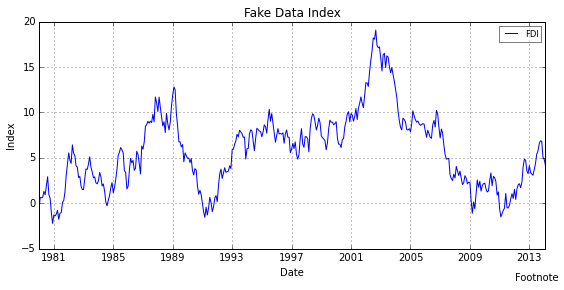

In [22]:
# Plot the data
plt.plot(x, y, label='FDI')
# 3. Add your labels and pretty-up the plot
plt.title('Fake Data Index')
plt.xlabel('Date')
plt.ylabel('Index')
plt.grid(True)
plt.figtext(0.995, 0.01, 'Footnote',
ha='right', va='bottom')
plt.legend(loc='best', framealpha=0.5,
prop={'size':'small'})
plt.tight_layout(pad=1)
plt.gcf().set_size_inches(8, 4)

fig1 = plt.gcf()
plt.show()
plt.draw()
#plt.close('all')

In [20]:
# 4. SAVE the figure
fig1.savefig('filename.png')
# 5. Finally, close the figure
plt.close('all')

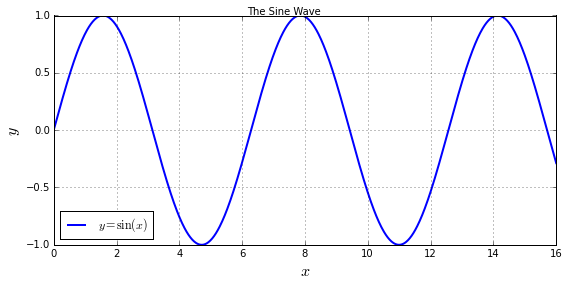

In [23]:
# Single plot constructed with Figure and Axes
# --- get the data
x = np.linspace(0, 16, 800)
y = np.sin(x)
# --- get an empty figure and add an Axes
fig = plt.figure(figsize=(8,4))
ax = fig.add_subplot(1,1,1) # row-col-num
# --- line plot data on the Axes
ax.plot(x, y, 'b-', linewidth=2,
label=r'$y=\sin(x)$')
# --- add title, labels and legend, etc.
ax.set_ylabel(r'$y$', fontsize=16);
ax.set_xlabel(r'$x$', fontsize=16)
ax.legend(loc='best')
ax.grid(True)
fig.suptitle('The Sine Wave')
fig.tight_layout(pad=1)
fig.savefig('filename.png', dpi=125)

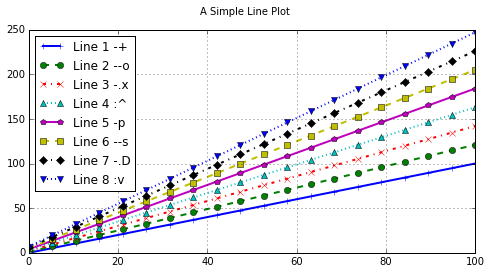

In [25]:
# Multiple lines with markers on a line plot
# --- get the Figure and Axes all at once
fig, ax = plt.subplots(figsize=(8,4))
# --- plot some lines
N = 8 # the number of lines we will plot
styles = ['-', '--', '-.', ':']
markers = list('+ox^psDv')
x = np.linspace(0, 100, 20)
for i in range(N): # add line-by-line
    y = x + x/5*i + i
    s = styles[i % len(styles)]
    m = markers[i % len(markers)]
    ax.plot(x, y,
    label='Line '+str(i+1)+' '+s+m,
    marker=m, linewidth=2, linestyle=s)
# --- add grid, legend, title and save
ax.grid(True)
ax.legend(loc='best', prop={'size':'large'})
fig.suptitle('A Simple Line Plot')
fig.savefig('filename.png', dpi=125)

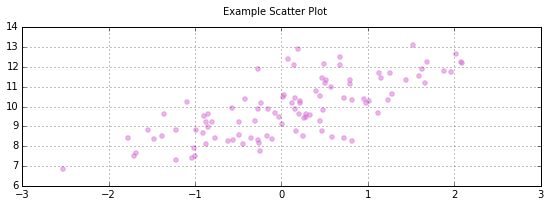

In [26]:
# A simple scatter plot
x = np.random.randn(100)
y = x + np.random.randn(100) + 10
fig, ax = plt.subplots(figsize=(8, 3))
ax.scatter(x, y, alpha=0.5, color='orchid')
fig.suptitle('Example Scatter Plot')
fig.tight_layout(pad=2);
ax.grid(True)
fig.savefig('filename1.png', dpi=125)

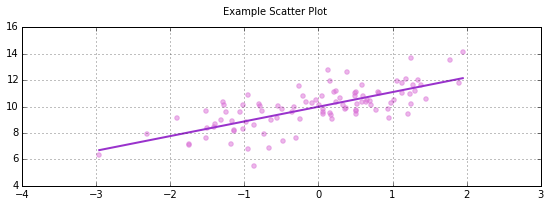

In [28]:
# A simple scatter plot
x = np.random.randn(100)
y = x + np.random.randn(100) + 10
fig, ax = plt.subplots(figsize=(8, 3))
ax.scatter(x, y, alpha=0.5, color='orchid')
fig.suptitle('Example Scatter Plot')
fig.tight_layout(pad=2);
ax.grid(True)
fig.savefig('filename1.png', dpi=125)# Add a regression line (using statsmodels)
import statsmodels.api as sm
x = sm.add_constant(x) # intercept
# Model: y ~ x + c
model = sm.OLS(y, x)
fitted = model.fit()
x_pred = np.linspace(x.min(), x.max(), 50)
x_pred2 = sm.add_constant(x_pred)
y_pred = fitted.predict(x_pred2)
ax.plot(x_pred, y_pred, '-',
color='darkorchid', linewidth=2)
fig.savefig('filename2.png', dpi=125)

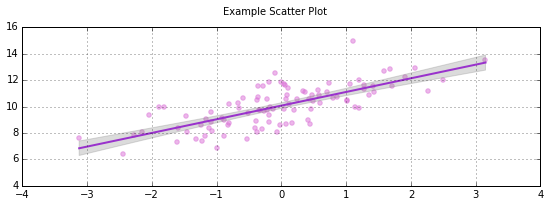

In [31]:
# A simple scatter plot
x = np.random.randn(100)
y = x + np.random.randn(100) + 10
fig, ax = plt.subplots(figsize=(8, 3))
ax.scatter(x, y, alpha=0.5, color='orchid')
fig.suptitle('Example Scatter Plot')
fig.tight_layout(pad=2);
ax.grid(True)
fig.savefig('filename1.png', dpi=125)# Add a regression line (using statsmodels)
import statsmodels.api as sm
x = sm.add_constant(x) # intercept
# Model: y ~ x + c
model = sm.OLS(y, x)
fitted = model.fit()
x_pred = np.linspace(x.min(), x.max(), 50)
x_pred2 = sm.add_constant(x_pred)
y_pred = fitted.predict(x_pred2)
ax.plot(x_pred, y_pred, '-',
color='darkorchid', linewidth=2)
fig.savefig('filename2.png', dpi=125)
# Add confidence bands for the regression line
y_hat = fitted.predict(x)
y_err = y - y_hat
mean_x = x.T[1].mean()
n = len(x)
dof = n - fitted.df_model - 1
from scipy import stats
t = stats.t.ppf(1-0.025, df=dof) # 2-tail
s_err = np.sum(np.power(y_err, 2))
conf = t * np.sqrt((s_err/(n-2))*(1.0/n +
    (np.power((x_pred-mean_x),2) /
    ((np.sum(np.power(x_pred,2))) -
    n*(np.power(mean_x,2))))))
upper = y_pred + abs(conf)
lower = y_pred - abs(conf)
ax.fill_between(x_pred, lower, upper,
    color='#888888', alpha=0.3)
fig.savefig('filename3.png', dpi=125)

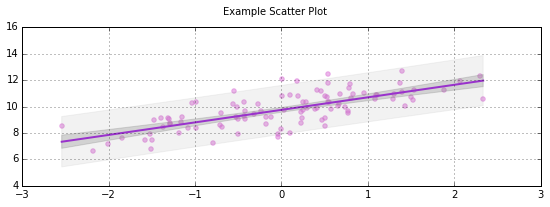

In [34]:
# A simple scatter plot
x = np.random.randn(100)
y = x + np.random.randn(100) + 10
fig, ax = plt.subplots(figsize=(8, 3))
ax.scatter(x, y, alpha=0.5, color='orchid')
fig.suptitle('Example Scatter Plot')
fig.tight_layout(pad=2);
ax.grid(True)
fig.savefig('filename1.png', dpi=125)# Add a regression line (using statsmodels)
import statsmodels.api as sm
x = sm.add_constant(x) # intercept
# Model: y ~ x + c
model = sm.OLS(y, x)
fitted = model.fit()
x_pred = np.linspace(x.min(), x.max(), 50)
x_pred2 = sm.add_constant(x_pred)
y_pred = fitted.predict(x_pred2)
ax.plot(x_pred, y_pred, '-',
color='darkorchid', linewidth=2)
fig.savefig('filename2.png', dpi=125)
# Add confidence bands for the regression line
y_hat = fitted.predict(x)
y_err = y - y_hat
mean_x = x.T[1].mean()
n = len(x)
dof = n - fitted.df_model - 1
from scipy import stats
t = stats.t.ppf(1-0.025, df=dof) # 2-tail
s_err = np.sum(np.power(y_err, 2))
conf = t * np.sqrt((s_err/(n-2))*(1.0/n +
    (np.power((x_pred-mean_x),2) /
    ((np.sum(np.power(x_pred,2))) -
    n*(np.power(mean_x,2))))))
upper = y_pred + abs(conf)
lower = y_pred - abs(conf)
ax.fill_between(x_pred, lower, upper,
    color='#888888', alpha=0.3)
fig.savefig('filename3.png', dpi=125)
# Add a prediction interval for the regression line
from statsmodels.sandbox.regression.predstd import wls_prediction_std
sdev, lower, upper = wls_prediction_std(fitted, exog=x_pred2, alpha=0.05)
ax.fill_between(x_pred, lower, upper, color='#888888', alpha=0.1)
fig.savefig('filename4.png', dpi=125)

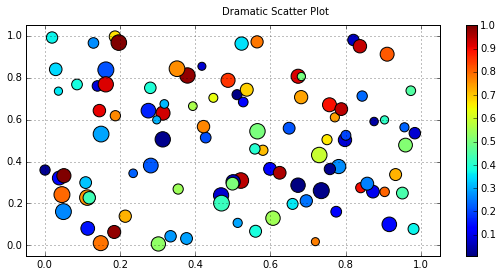

In [36]:
# Changing the marker size and colour
N = 100
x = np.random.rand(N)
y = np.random.rand(N)
size = ((np.random.rand(N) + 1) * 8) ** 2
colours = np.random.rand(N)
fig, ax = plt.subplots(figsize=(8,4))
l = ax.scatter(x, y, s=size, c=colours)
fig.colorbar(l)
ax.set_xlim((-0.05, 1.05))
ax.set_ylim((-0.05, 1.05))
fig.suptitle('Dramatic Scatter Plot')
fig.tight_layout(pad=2);
ax.grid(True)
fig.savefig('filename.png', dpi=125)

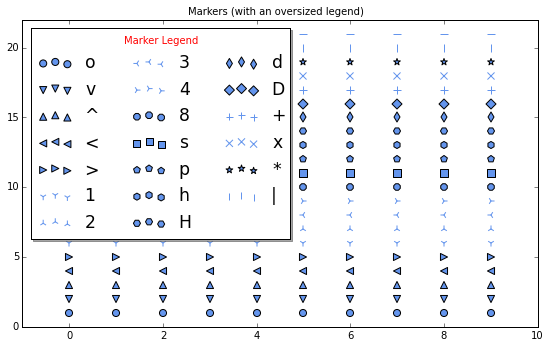

In [38]:
# Changing the marker symbol
fig, ax = plt.subplots(figsize=(8,5))
markers = list('ov^<>12348sphHdD+x*|_')
N = 10
for i, m in enumerate(markers):
    x = np.arange(N)
    y = np.repeat(i+1, N)
    ax.scatter(x, y, marker=m, label=m, s=50, c='cornflowerblue')

ax.set_xlim((-1,N))
ax.set_ylim((0,len(markers)+1))
ax.legend(loc='upper left', ncol=3, prop={'size':'xx-large'}, shadow=True, title='Marker Legend')
ax.get_legend().get_title().set_color("red")
fig.suptitle('Markers ' + '(with an oversized legend)')
fig.tight_layout(pad=2);
fig.savefig('filename.png', dpi=125)

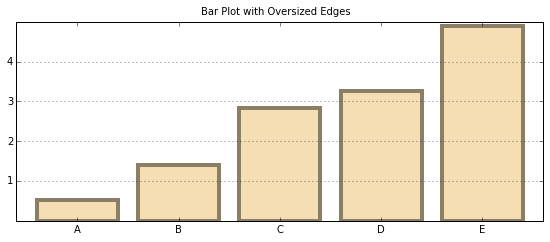

In [40]:
# A simple bar chart
#T he bars in a bar-plot are placed to the right of the bar x-
# axis location by default. Centred labels require a little
# jiggling with the bar and label positions.
# --- get the data
N = 5
labels = list('ABCDEFGHIJKLM'[0:N])
data = np.array(range(N)) + np.random.rand(N)
# --- plot the data
fig, ax = plt.subplots(figsize=(8, 3.5))
width = 0.8;
tickLocations = np.arange(N)
rectLocations = tickLocations-(width/2.0)
ax.bar(rectLocations, data, width, color='wheat', edgecolor='#8B7E66', linewidth=4.0)
# --- pretty-up the plot
ax.set_xticks(ticks= tickLocations)
ax.set_xticklabels(labels)
ax.set_xlim(min(tickLocations)-0.6, max(tickLocations)+0.6)
ax.set_yticks(range(N)[1:])
ax.set_ylim((0,N))
ax.yaxis.grid(True)
# --- title and save
fig.suptitle("Bar Plot with " + "Oversized Edges")
fig.tight_layout(pad=2)
fig.savefig('filename.png', dpi=125)

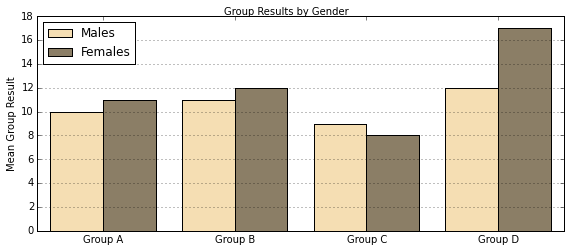

In [41]:
# Side by side bar chart
# --- get the data
before = np.array([10, 11, 9, 12])
after = np.array([11, 12, 8, 17])
labels=['Group '+x for x in list('ABCD')]
# --- the plot – left then right
fig, ax = plt.subplots(figsize=(8, 3.5))
width = 0.4 # bar width
xlocs = np.arange(len(before))
ax.bar(xlocs-width, before, width, color='wheat', label='Males')
ax.bar(xlocs, after, width, color='#8B7E66', label='Females')
# --- labels, grids and title, then save
ax.set_xticks(ticks=range(len(before)))
ax.set_xticklabels(labels)
ax.yaxis.grid(True)
ax.legend(loc='best')
ax.set_ylabel('Mean Group Result')
fig.suptitle('Group Results by Gender')
fig.tight_layout(pad=1)
fig.savefig('filename.png', dpi=125)

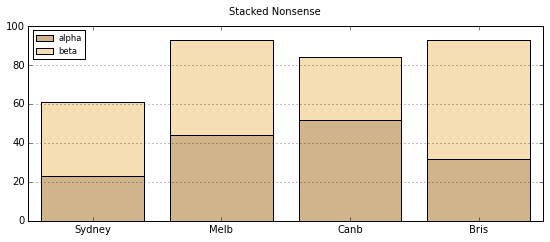

In [42]:
# Stacked bar
# --- get some data
alphas = np.array( [23, 44, 52, 32] )
betas = np.array( [38, 49, 32, 61] )
labels = ['Sydney', 'Melb', 'Canb', 'Bris']
# --- the plot
fig, ax = plt.subplots(figsize=(8, 3.5))
width = 0.8;
xlocations=np.array(range(len(alphas)+2))
adjlocs = xlocations[1:-1] - width/2.0
ax.bar(adjlocs, alphas, width, label='alpha', color='tan')
ax.bar(adjlocs, betas, width, label='beta', color='wheat', bottom=alphas)
# --- pretty-up and save
ax.set_xticks(ticks=xlocations[1:-1])
ax.set_xticklabels(labels)
ax.yaxis.grid(True)
ax.legend(loc='best', prop={'size':'small'})
fig.suptitle("Stacked Nonsense")
fig.tight_layout(pad=2)
fig.savefig('filename.png', dpi=125)

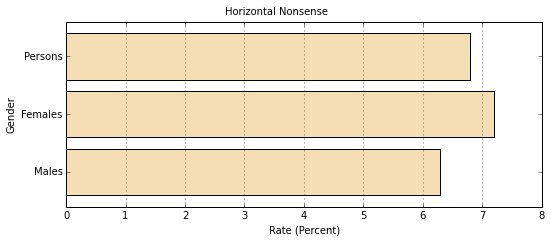

In [43]:
# Horizontal bar charts
# Just as tick placement needs to be managed with
# vertical bars; so with horizontal bars (which are above
# the y-tick mark)
labels = ['Males', 'Females', 'Persons']
data = [6.3, 7.2, 6.8]
width = 0.8
yTickPos = np.arange(len(data))
yBarPos = yTickPos - (width/2.0)
fig, ax = plt.subplots(figsize=(8, 3.5))
ax.barh(yBarPos,data,width,color='wheat')
ax.set_yticks(ticks= yTickPos)
ax.set_yticklabels(labels)
ax.set_ylim((min(yTickPos)-0.6, max(yTickPos)+0.6))
ax.xaxis.grid(True)
ax.set_ylabel('Gender');
ax.set_xlabel('Rate (Percent)')
fig.suptitle("Horizontal Nonsense")
fig.tight_layout(pad=2)
fig.savefig('filename.png', dpi=125)

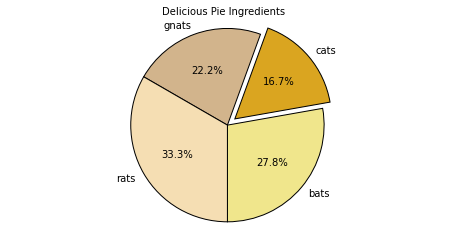

In [44]:
# As nice as pie
# --- get some data
data = np.array([5,3,4,6])
labels = ['bats', 'cats', 'gnats', 'rats']
explode = (0, 0.1, 0, 0) # explode cats
colrs=['khaki', 'goldenrod', 'tan', 'wheat']
# --- the plot
fig, ax = plt.subplots(figsize=(8, 3.5))
ax.pie(data, explode=explode,
labels=labels, autopct='%1.1f%%',
startangle=270, colors=colrs)
ax.axis('equal') # keep it a circle
# --- tidy-up and save
fig.suptitle("Delicious Pie Ingredients")
fig.savefig('filename.png', dpi=125)

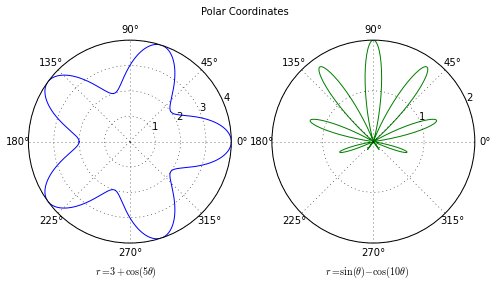

In [45]:
# Polar coordinates
# --- theta
theta = np.linspace(-np.pi, np.pi, 800)
# --- get us a Figure
fig = plt.figure(figsize=(8,4))
# --- left hand plot
ax = fig.add_subplot(1,2,1, polar=True)
r = 3 + np.cos(5*theta)
ax.plot(theta, r)
ax.set_yticks([1,2,3,4])
# --- right hand plot
ax = fig.add_subplot(1,2,2, polar=True)
r = (np.sin(theta)) - (np.cos(10*theta))
ax.plot(theta, r, color='green')
ax.set_yticks([1,2])
# --- title, explanatory text and save
fig.suptitle('Polar Coordinates')
fig.text(x=0.24, y=0.05,
s=r'$r = 3 + \cos(5 \theta)$')
fig.text(x=0.64, y=0.05,
s=r'$r = \sin(\theta) - \cos(10' +
r'\theta)$')
fig.savefig('filename.png', dpi=125)

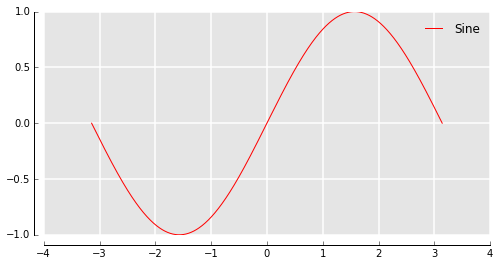

In [46]:
# Hiding the top and right spines
x = np.linspace(-np.pi, np.pi, 800)
y = np.sin(x)
fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(x, y, label='Sine', color='red')
ax.set_axis_bgcolor('#e5e5e5')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.spines['left'].set_position(
('outward',10))
ax.spines['bottom'].set_position(
('outward',10))
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
# do the ax.grid() after setting ticks
ax.grid(b=True, which='both',
color='white', linestyle='-',
linewidth=1.5)
ax.set_axisbelow(True)
ax.legend(loc='best', frameon=False)
fig.savefig('filename.png', dpi=125)

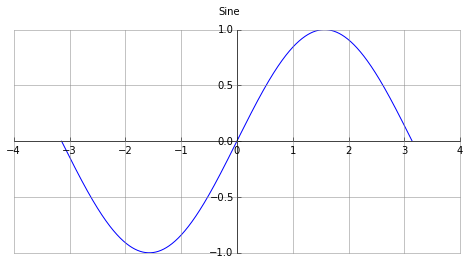

In [47]:
# Spines in the middle
x = np.linspace(-np.pi, np.pi, 800)
y = np.sin(x)
fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(x, y, label='Sine')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position((
'data',0))
ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position((
'data',0))
ax.grid(b=True, which='both',
color='#888888', linestyle='-',
linewidth=0.5)
fig.suptitle('Sine')
fig.savefig('filename.png', dpi=125)

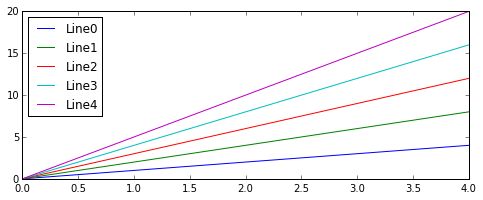

In [48]:
# Legend within the plot
# Use the 'loc' argument to place the legend
N = 5
x = np.arange(N)
fig, ax = plt.subplots(figsize=(8, 3))
for j in range(5):
    ax.plot(x, x*(j+1),label='Line'+str(j))

ax.legend(loc='upper left')
fig.savefig('filename.png', dpi=125)

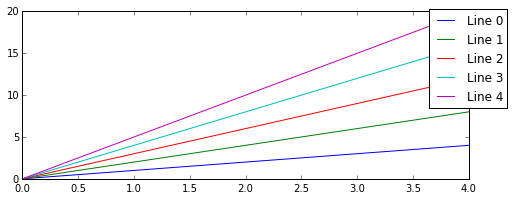

In [50]:
# Legend slightly outside of the plot
N = 5
x = np.arange(N)
fig, ax = plt.subplots(figsize=(8, 3))
for j in range(5):
    ax.plot(x, x*(j+1), label='Line '+str(j))

ax.legend(bbox_to_anchor=(1.1, 1.05))
fig.savefig('filename.png', dpi=125)

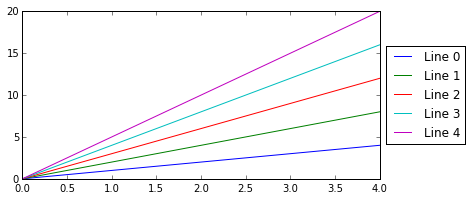

In [51]:
# Legend to the right of the plot
N = 5
x = np.arange(N)
fig, ax = plt.subplots(figsize=(8, 3))
for j in range(5):
    ax.plot(x, x*(j+1), label='Line '+str(j))

box = ax.get_position() # Shrink plot
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(bbox_to_anchor=(1, 0.5), loc='center left') # Put legend
fig.savefig('filename.png', dpi=125)

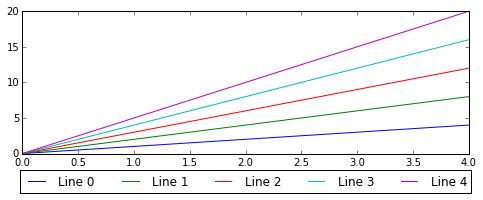

In [53]:
# Legend below the plot
N = 5
x = np.arange(N)
fig, ax = plt.subplots(figsize=(8, 3))
for j in range(5):
    ax.plot(x, x*(j+1),
        label='Line '+str(j))
    
box = ax.get_position()
ax.set_position([box.x0, box.y0 + box.height * 0.15, box.width, box.height * 0.85])
ax.legend(bbox_to_anchor=(0.5, -0.075), loc='upper center', ncol=N)
fig.savefig('filename.png', dpi=125)

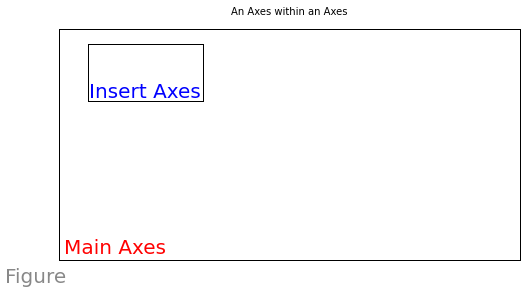

In [54]:
# Using Axes to place a plot within a plot
fig = plt.figure(figsize=(8,4))
fig.text(x=0.01, y=0.01, s='Figure', color='#888888', ha='left', va='bottom', fontsize=20)
# --- Main Axes
ax = fig.add_axes([0.1,0.1,0.8,0.8])
ax.text(x=0.01, y=0.01, s='Main Axes', color='red', ha='left', va='bottom', fontsize=20)
ax.set_xticks([]); ax.set_yticks([])
# --- Insert Axes
ax= fig.add_axes([0.15,0.65,0.2,0.2])
ax.text(x=0.01, y=0.01, s='Insert Axes', color='blue', ha='left', va='bottom', fontsize=20)
ax.set_xticks([]); ax.set_yticks([])
fig.suptitle('An Axes within an Axes')

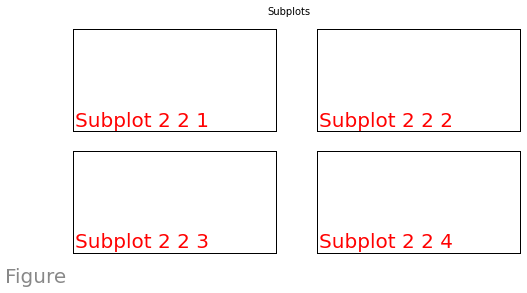

In [55]:
# Simple subplot grid layouts
fig = plt.figure(figsize=(8,4))
fig.text(x=0.01, y=0.01, s='Figure',
    color='#888888', ha='left',
    va='bottom', fontsize=20)
for i in range(4):
    # fig.add_subplot(nrows, ncols, num)
    ax = fig.add_subplot(2, 2, i+1)
    ax.text(x=0.01, y=0.01, s='Subplot 2 2 '+str(i+1), color='red', ha='left', va='bottom', fontsize=20)
    ax.set_xticks([]); ax.set_yticks([])

ax.set_xticks([]); ax.set_yticks([])
fig.suptitle('Subplots')
fig.savefig('filename.png', dpi=125)

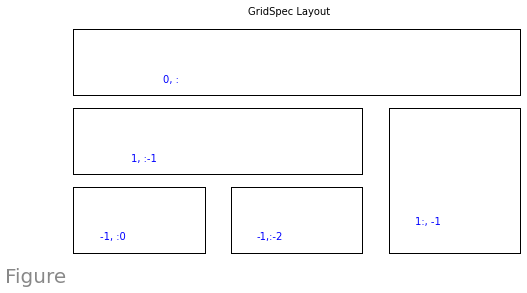

In [56]:
#Using GridSpec layouts (like list slicing)
import matplotlib.gridspec as gs
gs = gs.GridSpec(3, 3) # nrows, ncols
fig = plt.figure(figsize=(8,4))
fig.text(x=0.01, y=0.01, s='Figure', color='#888888', ha='left', va='bottom', fontsize=20)
ax1 = fig.add_subplot(gs[0, :]) # row,col
ax1.text(x=0.2,y=0.2,s='0, :', color='b')
ax2 = fig.add_subplot(gs[1,:-1])
ax2.text(x=0.2,y=0.2,s='1, :-1', color='b')
ax3 = fig.add_subplot(gs[1:, -1])
ax3.text(x=0.2,y=0.2, s='1:, -1', color='b')
ax4 = fig.add_subplot(gs[-1,0])
ax4.text(x=0.2,y=0.2, s='-1, :0', color='b')
ax5 = fig.add_subplot(gs[-1,-2])
ax5.text(x=0.2,y=0.2, s='-1,:-2', color='b')
for a in fig.get_axes():
    a.set_xticks([])
    a.set_yticks([])

fig.suptitle('GridSpec Layout')
fig.savefig('filename.png', dpi=125)

In [57]:
# Configuration files
# Matplotlib uses configuration files to set the defaults. So
# that you can edit it, the location of the configuration file
# can be found as follows:
print (matplotlib.matplotlib_fname())
# Configuration settings
# The current configuration settings
print (matplotlib.rcParams)
# Change the default settings
plt.rc('figure', figsize=(8,4), dpi=125,
facecolor='white', edgecolor='white')
plt.rc('axes', facecolor='#e5e5e5', grid=True, linewidth=1.0, axisbelow=True)
plt.rc('grid', color='white', linestyle='-', linewidth=2.0, alpha=1.0)
plt.rc('xtick', direction='out')
plt.rc('ytick', direction='out')
plt.rc('legend', loc='best')

C:\Users\Shonket\Anaconda\lib\site-packages\matplotlib\mpl-data\matplotlibrc
agg.path.chunksize: 0
animation.avconv_args: []
animation.avconv_path: avconv
animation.bitrate: -1
animation.codec: mpeg4
animation.convert_args: []
animation.convert_path: convert
animation.ffmpeg_args: []
animation.ffmpeg_path: ffmpeg
animation.frame_format: png
animation.mencoder_args: []
animation.mencoder_path: mencoder
animation.writer: ffmpeg
axes.axisbelow: False
axes.color_cycle: [u'b', u'g', u'r', u'c', u'm', u'y', u'k']
axes.edgecolor: k
axes.facecolor: w
axes.formatter.limits: [-7, 7]
axes.formatter.use_locale: False
axes.formatter.use_mathtext: False
axes.formatter.useoffset: True
axes.grid: False
axes.grid.which: major
axes.hold: True
axes.labelcolor: k
axes.labelsize: medium
axes.labelweight: normal
axes.linewidth: 1.0
axes.titlesize: large
axes.titleweight: normal
axes.unicode_minus: True
axes.xmargin: 0.0
axes.ymargin: 0.0
axes3d.grid: True
backend: module://IPython.kernel.zmq.pylab.backend_i